In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Dogs vs Cats without Augmentation

##  Introduction:
This exercise will show how to classify images into pictures of cats or pictures of dogs.  We'll build an image classifer using tf.keras.Sequential model and load data using tf.keras.preprocessing.image.imageDataGenerator

## Note 1:
-  Building data input pipelines using the tf.keras.preprocessing.image.ImageDataGenerator class. How can we efficiently work with data on disk to interface with our model?

### Data Loading:
We are loading our dataset from Kaggle and is a filtered verison of Dogs vs. Cats.
'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [1]:
#Import Packages

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)



In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin = _URL, extract = True)




### Note 2:
##### The dataset below has the following directory structure.

cats_and_dogs_filtered
|__ train
    |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validation
    |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]

In [3]:
#Listing the directories with the following terminal command:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print


/Users/kyledee/.keras/datasets
/Users/kyledee/.keras/datasets/cats_and_dogs_filtered
/Users/kyledee/.keras/datasets/cats_and_dogs_filtered/train
/Users/kyledee/.keras/datasets/cats_and_dogs_filtered/train/dogs
/Users/kyledee/.keras/datasets/cats_and_dogs_filtered/train/cats
/Users/kyledee/.keras/datasets/cats_and_dogs_filtered/validation
/Users/kyledee/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/Users/kyledee/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [4]:
# Now we will assign variables with the proper file path for the training and validation sets.
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats') #directory with our training cat pictures
train_dog_dir = os.path.join(train_dir, 'dogs') #directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # directory with our validation dog pictures




### Understanding our data:
Investigate how many cats and dogs images we have in our training and validation directory.


In [5]:
num_cats_tr = len(os.listdir(train_cat_dir))
num_dogs_tr = len(os.listdir(train_dog_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('\n')
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print('\n')
print('total training images:', total_train)
print('total validation images:', total_val)



total training cat images: 1000
total training dog images: 1000


total validation cat images: 500
total validation dog images: 500


total training images: 2000
total validation images: 1000


### Setting Parameters:
Set up variables that will be used later while pre-processing our dataset and training our network.

In [7]:
BATCH_SIZE = 100 # Number of training examples to be process before updating our models variables
IMG_SHAPE = 150  #Our training data consists of images with width of 150 pixels and height of 150 pixels



### Data Preparation:
Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network. The steps involved in preparing these images are:
- 1. Read images from the disk
- 2. Decode contents of these images and convert it into proper gird format as per their RGB content.
- 3. Convert them into floating point tensors.
- 4. Rescale the tensors form values between 0 and 255 to value between 0 and 1, as neural networks prefer to deal with small input values.

##### These tasks are done by using tf.keras.preprocessing.image.ImageDataGenerator


In [8]:
train_image_generator      = ImageDataGenerator(rescale = 1./255)   #Generator of our training data
validation_image_generator = ImageDataGenerator(rescale = 1./255)   #Generator of our validation data

### Note 3:

After defining our generators for training and validation images, flow_from_directory method will load images from the disk, apply rescaling, and resize them using single line of code.


In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE), #(150, 150)
                                                           class_mode = 'binary')



Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                              directory = validation_dir,
                                                              shuffle = False,
                                                              target_size = (IMG_SHAPE, IMG_SHAPE),
                                                              class_mode = 'binary')




Found 1000 images belonging to 2 classes.


#### Visualizing Training Images:
 We can visualize our training images by getting a batch of images from the training generator, and then plotting a few of them using matplotlib.

In [11]:
sample_training_images, _ = next(train_data_gen)
#The next function returns a batch from the dataset.  
#One batch is a tuple of(many images, many labels).

In [12]:
#The function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each colunm.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()



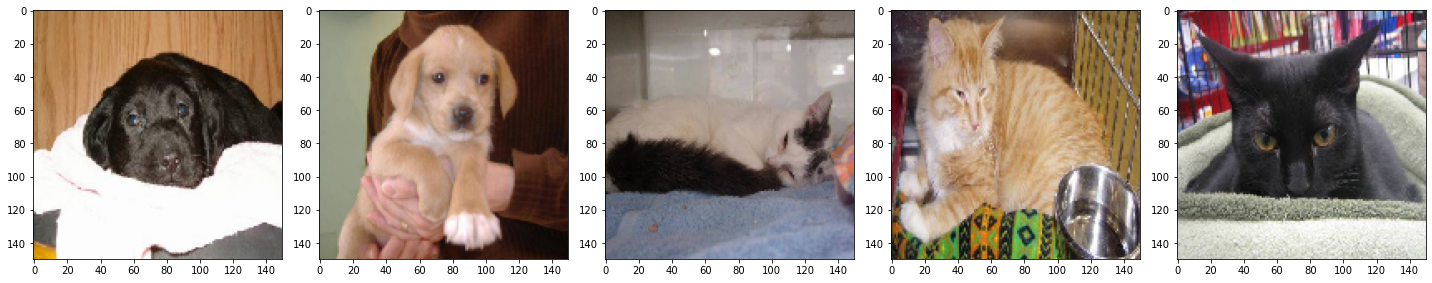

In [13]:
plotImages(sample_training_images[:5]) #Plot images 0-5

#### Define the Model:
The model consists of four convolution blocks with a max pool layer in each of them.  Then we have a fully connected layer with 512, with a relu activation function.  The model will output class probabilities for two classes - dogs and cats - using softmax

In [14]:
# Model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(2)
])




#### Compile the Data:

As ususal, we will use the adam optimizer.  Since we ouput a softma categorization, we'll use sparse_categorical_crossentropy as the loss function.  We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [15]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

#### Model Summary:
Look at all the layers of our network using the summary method

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#### Training Our Data:

Recall that our batches are coming from a generator(ImageDataGenerator), we'll use fit_generator instead of fit.


In [17]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)) )
)




<ipython-input-17-145f301d49b1>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 75s 4s/step - loss: 0.7136 - accuracy: 0.5090 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 97s 5s/step - loss: 0.6912 - accuracy: 0.5420 - val_loss: 0.6856 - val_accuracy: 0.5020
Epoch 3/100
20/20 [==============================] - 79s 4s/step - loss: 0.6829 - accuracy: 0.5510 - val_loss: 0.6795 - val_accuracy: 0.5670
Epoch 4/100
20/20 [==============================] - 70s 3s/step - loss: 0.6562 - accuracy: 0.6080 - val_loss: 0.6483 - val_accuracy: 0.6130
Epoch 5/100
20/20 [==============================] - 71s 4s/step - loss: 0.6362 - accuracy: 0.6305 - val_loss: 0.6138 - val_accuracy: 0.6510
Epoch 6/100
20/20 [==============================] - 71s 4s/step - loss: 0.5888 - accuracy: 0.6935 - val_loss: 0.5959 - val_accuracy: 0.6920
Epoch 7/100
20/20 [==============================] - 71s 4s/step - loss: 0.5512 - accuracy: 0.6975 - val_loss: 0.5806 - val_accuracy: 0.7060
Epoch 8/100
2

#### Training Model Results
The trained model has a validation accruacy of 0.75 (75 percent) on the training data.


#### Visualization
We'll now visualize the results of the our trained network.


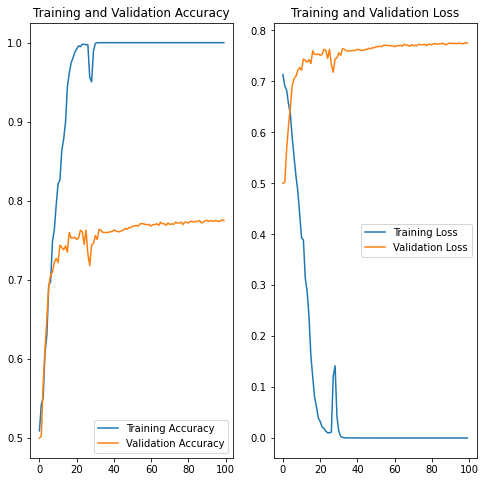

In [22]:
#Graphing
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_accuracy']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'center right')
plt.title('Training and Validation Loss')
plt.show()



#### Conclusion:
From the plot, we can see that the training accuracy and validation accuarcy are off by a large margin.  Recall that our trained model has only achieved around 75% on the validation set.  

The graph shows that the model is overfitting the data.  Notice that once the training and validation curves starts to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.

